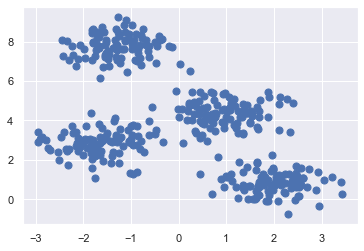

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
#for plot styling
import seaborn as sns; sns.set()
import numpy as np
import sklearn.datasets
X, y_true = sklearn.datasets.make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:, 1], s=50)

In [17]:
#assign for clusters
from sklearn.cluster import KMeans
kmeans =KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

#import libraries
from sklearn.metrics import pairwise_distances_argmin_min
def find_clusters(X, n_clusters, rseed=2):
    #randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        #assign labels based on the closet center
        labels = pairwise_distances_argmin_min(X, centers)
        
        #find new centers from mean of points
        new_centers = np.array([X[labels == i].mean(0)
                               for i in range(n_clusters)])
        
        #check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
    return centers, labels
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s = 50, cmap='viridis')
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)

<ipython-input-17-ab082438137e>:20: RuntimeWarning: Mean of empty slice.
  new_centers = np.array([X[labels == i].mean(0)
C:\Users\Chandi\anaconda3\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
<ipython-input-17-ab082438137e>:24: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.all(centers == new_centers):


ValueError: Found array with dim 3. check_pairwise_arrays expected <= 2.